<a href="https://colab.research.google.com/github/Muntasir2179/pytorch-learnig/blob/custom-dataset/04_pytorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing PyTorch and setting up device-agnostic code

In [67]:
!pip install torchinfo

In [1]:
import torch
from torch import nn
torch.__version__

'2.1.0+cu118'

In [2]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Getting some data for our FoodVision project

In [3]:
import requests
import zipfile
from pathlib import Path

# setup path to a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# if the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} dicectory already exist.....skipping download")
else:
  print(f"{image_path} does not exist, creating one....")
  image_path.mkdir(parents=True, exist_ok=True)

# download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"Downloading pizza, steak and sushi data....")
  f.write(request.content)

# unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data....")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one....
Unzipping pizza, steak and sushi data....


# Becoming one with the data (data preparation and data exploration)

In [4]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [6]:
# setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# visualizing images from the dataset

1. Get all the image path.
2. Pick a random image path using Python's random.choice()
3. Get the image class name using pathlib.Path.parent.stem
4. Since we're working with images, let's open the image with Python's PIL.
5. We'll then show the image and print metadata.

Random image path: data/pizza_steak_sushi/train/pizza/29417.jpg
Image class: pizza
Image height: 512
Image width: 384


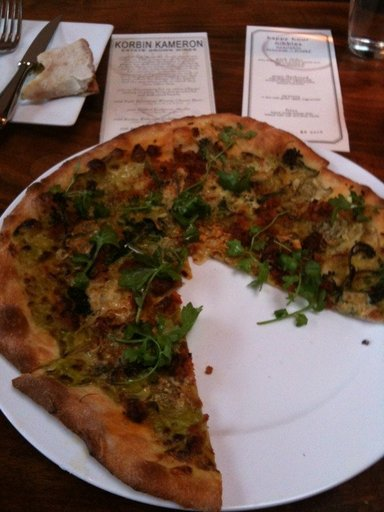

In [7]:
import random
from PIL import Image

# set seed
# random.seed(42)

# get all the image path
# /content/data/pizza_steak_sushi
image_path_list = list(image_path.glob("*/*/*.jpg"))

# pick a random image path
random_image_path = random.choice(image_path_list)

# get the image class from the path name
# the image class is the name of the directory where the image is stored
image_class = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

# print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

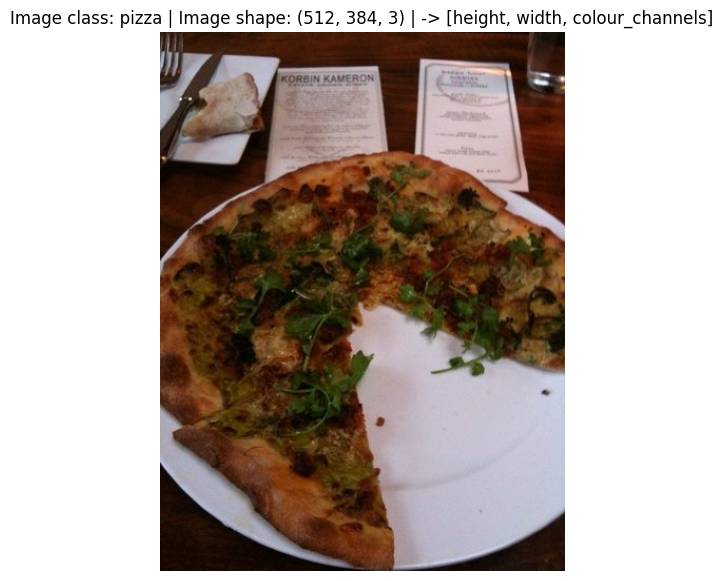

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# turn the image into an array
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} | -> [height, width, colour_channels]")
plt.axis(False)
plt.show()

# Transforming data

1. Resizing the image.
2. Fliping the image to create diversed representation.
3. Convert to tensor.

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
# writing a transform for image
data_transform = transforms.Compose([
    # resize the images
    transforms.Resize(size=(64, 64)),
    # Fliping the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()
])

In [11]:
data_transform(img)

tensor([[[0.0510, 0.0824, 0.0941,  ..., 0.2510, 0.2627, 0.2431],
         [0.0980, 0.1137, 0.1412,  ..., 0.2863, 0.3216, 0.2902],
         [0.1765, 0.1725, 0.1961,  ..., 0.3608, 0.4078, 0.4039],
         ...,
         [0.1451, 0.1451, 0.1529,  ..., 0.0902, 0.0902, 0.0941],
         [0.1451, 0.1608, 0.1804,  ..., 0.1020, 0.0980, 0.0902],
         [0.1451, 0.1490, 0.1373,  ..., 0.1059, 0.0980, 0.0902]],

        [[0.0431, 0.0667, 0.0706,  ..., 0.1686, 0.1843, 0.1608],
         [0.0510, 0.0667, 0.0902,  ..., 0.2078, 0.2510, 0.2157],
         [0.0706, 0.0706, 0.1020,  ..., 0.3216, 0.3804, 0.3961],
         ...,
         [0.0745, 0.0667, 0.0706,  ..., 0.0314, 0.0353, 0.0353],
         [0.0667, 0.0784, 0.0902,  ..., 0.0353, 0.0353, 0.0353],
         [0.0706, 0.0784, 0.0745,  ..., 0.0392, 0.0392, 0.0353]],

        [[0.0235, 0.0471, 0.0549,  ..., 0.1255, 0.1451, 0.1255],
         [0.0314, 0.0353, 0.0549,  ..., 0.1725, 0.2235, 0.2000],
         [0.0275, 0.0235, 0.0588,  ..., 0.3098, 0.3804, 0.

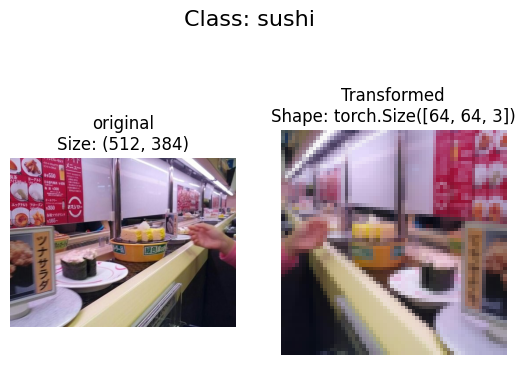

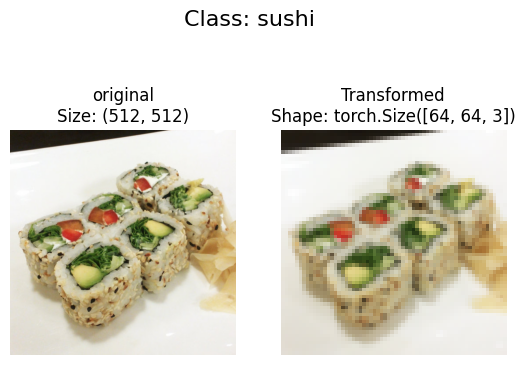

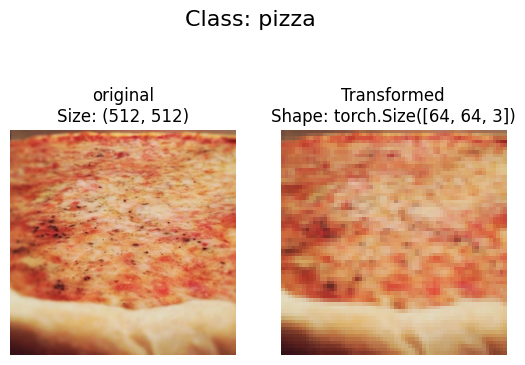

In [12]:
def plot_transformed_images(image_paths: list, transforms, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)  # randomply selecting n images form the image paths
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transforms(f).permute(1, 2, 0)

      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transforms=data_transform,
                        n=3,
                        seed=42)

# Loading Image data with ImageFolder

In [13]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,  # transforms for the data
                                  target_transform=None)     # transforms for the target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
# get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [15]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
# check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [17]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [18]:
# Index on the train_data dataset ot get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Original shape: torch.Size([3, 64, 64])
Image permute: torch.Size([64, 64, 3])


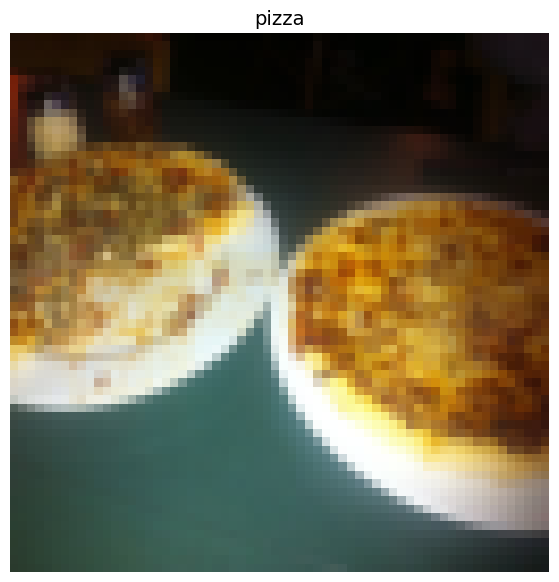

In [19]:
# rearrange the order of the dimensions
img_permute = img.permute(1, 2, 0)

# print out different shapes
print(f"Original shape: {img.shape}")
print(f"Image permute: {img_permute.shape}")

# plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)
plt.show()

# Turn loaded images into DataLoader

In [20]:
batch_size = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batch_size,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8a7d725d50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8a7d725de0>)

In [21]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [22]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])


# Loading Image data with a custom dataset

1. Want to be able to load images from file.
2. Want to be able to get class names from the Dataset.
3. Want to be able to get classes as dictionary from the Dataset.

Pros:

* Can create a `Dataset` out of anything.
* Not limited to PyTorch pre-build `Dataset` functions.

Cons:

* Even though we could create `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues.

In [23]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

## Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (the directory is in standard image classification format).
2. Raise an error if the class names are not found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.

In [24]:
[entry for entry in list(os.scandir(train_dir))]

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [25]:
# setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# get the class names form the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [26]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Could't find any classes in {directory}... please check file structure")

  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [27]:
class_names, class_to_idx = find_classes(target_directory)
class_names, class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Creating a custom `Dataset` to replicate `ImageFolder`

To create own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data form) as well as a transform if we'd like to transform our data.
3. Create several atributes:
   
   * path - paths of our images.
   * transform - the transform we'd like to use
   * classes - a list of the target classes
   * class_to_idx - a dict of the target classes mapped to integer labels.
4. Create a funciton to `load_image()`, this funciton will open an image.
5. Overwrite the `__len__()` method to return the length of our dataset.
6. Overwrite the `__getitem__()` method to return a given sample when passed an index.

In [28]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  # initialize our custom dataset
  def __init__(self, targ_dir: str, transform:None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # creating a function to load images
  def load_image(self, index: int) -> Image.Image:
    "opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    "Returns the totla number of samples."
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, Y)"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [29]:
# creating a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [30]:
# testing our ImageFolderCustom class
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [31]:
len(train_data), len(train_data_custom)

(225, 225)

In [32]:
len(test_data), len(test_data_custom)

(75, 75)

In [33]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [34]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

## Turn custom loaded images into `DataLoader`

In [35]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f8a7d724a90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8a7d725cc0>)

In [36]:
image_custom, label_custom = next(iter(train_dataloader_custom))
image_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# Data Augmentation

It is the process of artificially adding diversity to the training data. In the case of image data, it means applying various image transformations to the training images.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art lavels...

Blog post: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [37]:
# let's look at the trivialaugment
# https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#trivialaugment
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(224,224)),  # resizing the image
                                       # 0 <= num_magnitude_bins <= 31
                                       # it denotes how intense we want the augmentation to be happened
                                       transforms.TrivialAugmentWide(num_magnitude_bins=5),
                                       transforms.ToTensor() # converting to tensor
                                       ])

test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor()])

In [38]:
# get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/sushi/748830.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/390178.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2871052.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3360232.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3107839.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1280119.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/794647.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/542188.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2641778.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/148799.jpg')]

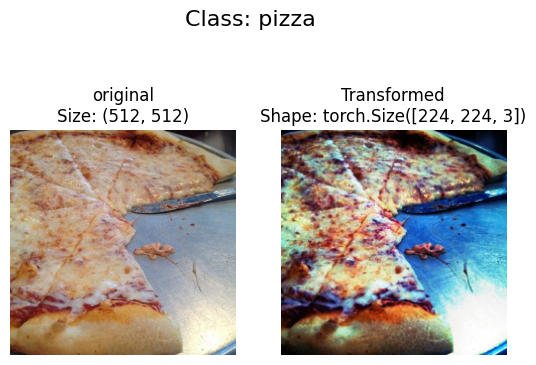

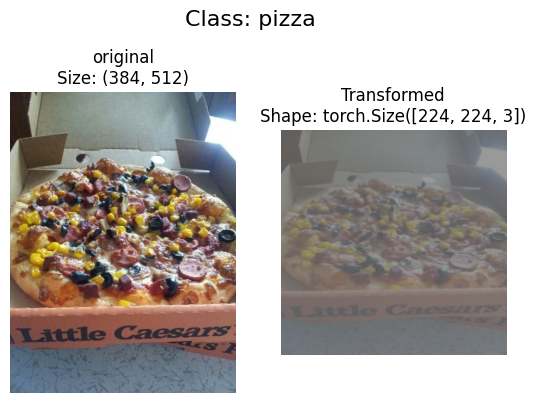

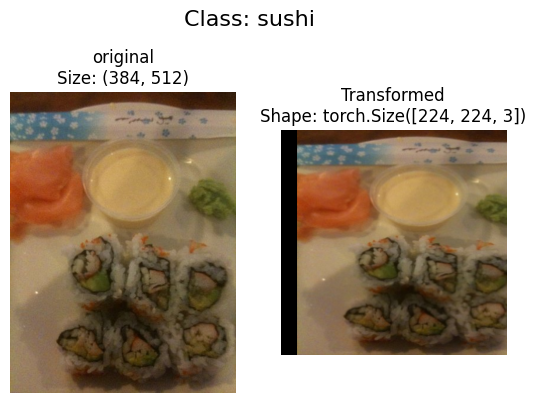

In [39]:
plot_transformed_images(image_paths=image_path_list,
                        transforms=train_transform,
                        n=3,
                        seed=None)

# Training models with normal data and augmented data

## Normal transformation

In [40]:
# creating a simple transform without any augmentation
simple_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                       transforms.ToTensor()])

In [41]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# turn the datasets in a dataloader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

## Building TinyVGG model

In [69]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)  # default stride value is the equal to the kernel size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)  # default stride value is the equal to the kernel size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 56 * 56, out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # benefits the operator fusion - https://horace.io/brrr_intro.html
    # return self.classifier(self.conv_block_2(self.conv_block_1(x)))
    # this method consumes less time because it does not spend time to switch between computation and memory

In [70]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of colour channels in the image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=31360, out_features=3, bias=True)
  )
)

In [71]:
image_batch, label_batch = next(iter(train_dataloader_simple))
model_0(image_batch.to(device))

tensor([[ 0.0353,  0.0382, -0.0261],
        [ 0.0359,  0.0376, -0.0278],
        [ 0.0371,  0.0398, -0.0279],
        [ 0.0366,  0.0398, -0.0288],
        [ 0.0366,  0.0385, -0.0301],
        [ 0.0331,  0.0428, -0.0265],
        [ 0.0371,  0.0387, -0.0299],
        [ 0.0319,  0.0402, -0.0262],
        [ 0.0358,  0.0366, -0.0305],
        [ 0.0349,  0.0417, -0.0281],
        [ 0.0376,  0.0430, -0.0293],
        [ 0.0368,  0.0407, -0.0271],
        [ 0.0387,  0.0410, -0.0276],
        [ 0.0339,  0.0418, -0.0286],
        [ 0.0366,  0.0405, -0.0291],
        [ 0.0389,  0.0421, -0.0290],
        [ 0.0351,  0.0425, -0.0270],
        [ 0.0373,  0.0414, -0.0290],
        [ 0.0381,  0.0398, -0.0296],
        [ 0.0307,  0.0381, -0.0286],
        [ 0.0358,  0.0398, -0.0271],
        [ 0.0359,  0.0403, -0.0299],
        [ 0.0383,  0.0407, -0.0290],
        [ 0.0348,  0.0423, -0.0284],
        [ 0.0345,  0.0398, -0.0249],
        [ 0.0374,  0.0442, -0.0288],
        [ 0.0386,  0.0379, -0.0284],
 

In [72]:
from torchinfo import summary

summary(model_0, input_size=(BATCH_SIZE, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 10, 224, 224]        280
│    └─ReLU: 2-2                         [32, 10, 224, 224]        --
│    └─Conv2d: 2-3                       [32, 10, 224, 224]        910
│    └─ReLU: 2-4                         [32, 10, 224, 224]        --
│    └─MaxPool2d: 2-5                    [32, 10, 112, 112]        --
├─Sequential: 1-2                        [32, 10, 56, 56]          --
│    └─Conv2d: 2-6                       [32, 10, 112, 112]        910
│    └─ReLU: 2-7                         [32, 10, 112, 112]        --
│    └─Conv2d: 2-8                       [32, 10, 112, 112]        910
│    └─ReLU: 2-9                         [32, 10, 112, 112]        --
│    └─MaxPool2d: 2-10                   [32, 10, 56, 56]          --
├─Sequentia